In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d quora/question-pairs-dataset


Dataset URL: https://www.kaggle.com/datasets/quora/question-pairs-dataset
License(s): other
  0% 0.00/20.8M [00:00<?, ?B/s]
100% 20.8M/20.8M [00:00<00:00, 1.16GB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/question-pairs-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
df = pd.read_csv('/content/questions.csv')

In [5]:
df.shape

(404351, 6)

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
new_df = df

In [11]:
import re
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags

    q = re.sub(r'<.*?>', '', q)
    q = re.sub(r'<.*?>', '', q)


    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    q = re.sub(r' \s', ' ', q)


    return q


In [12]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [13]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [14]:
new_df.dropna(inplace=True)

In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0


In [16]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [17]:
new_df.duplicated().sum()

np.int64(0)

is_duplicate
0    255042
1    149306
Name: count, dtype: int64
is_duplicate
0    63.074876
1    36.925124
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

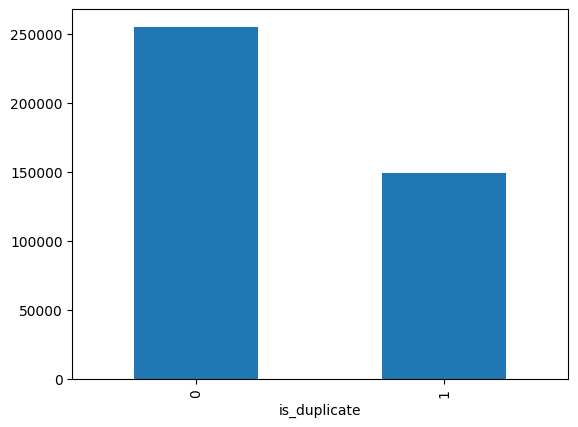

In [18]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [19]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789795
Number of questions getting repeated 13698


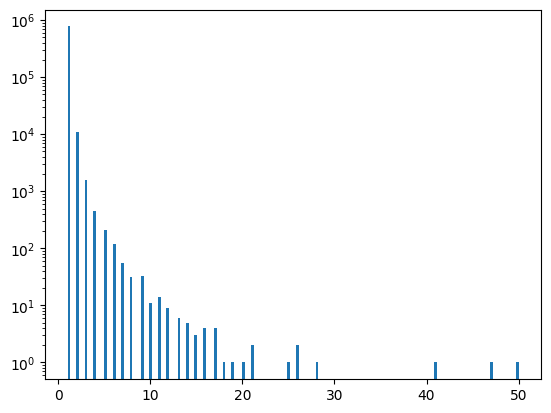

In [20]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [21]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [22]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0,48,55
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38


In [23]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0,48,55,11,13
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7


In [24]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [25]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,7
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0,48,55,11,13,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4


In [26]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [27]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,7,24
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0,48,55,11,13,0,21
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4,20


In [28]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,7,24,0.29
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24,0.17
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0,48,55,11,13,0,21,0.00
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4,20,0.20


In [29]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


In [31]:

import nltk
nltk.download('stopwords')
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for distance: filename=distance-0.1.3-py3-none-any.whl size=16321 sha256=6458a3150ee6cf14133c2cc04732bb42367ce2a690249d7d7adf6fb39eef77d5
  Stored in directory: /root/.cache/pip/wheels/fb/cd/9c/3ab5d666e3bcacc58900b10959edd3816cc9557c7337986322
Successfully built distance


In [39]:
import distance

def fetch_length_features(row):
    q1 = str(row['question1'])
    q2 = str(row['question2'])

    length_features = [0.0] * 3

    # Tokenize the sentences
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # 1. Absolute difference in number of tokens
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # 2. Mean number of tokens
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # 3. Longest common substring ratio (safe check)
    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0

    return length_features


In [40]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [41]:
!pip install fuzzywuzzy

In [42]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [43]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [44]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [45]:
new_df=new_df[new_df['q1_len']<300]

minimum characters 0
maximum characters 299
average num of characters 58


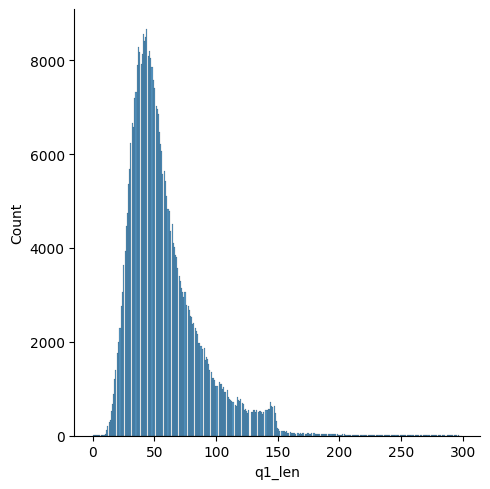

In [46]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

In [47]:
new_df=new_df[new_df['q2_len']<300]

minimum characters 0
maximum characters 299
average num of characters 58


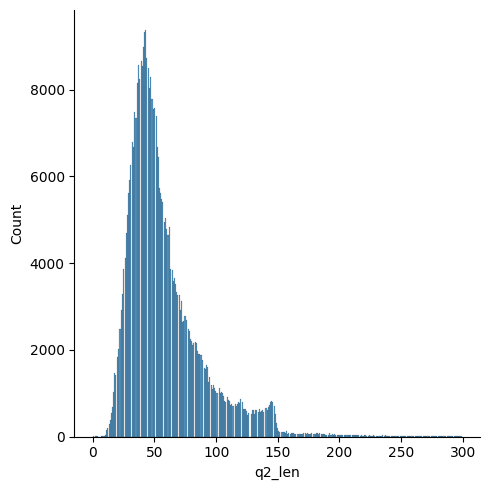

In [48]:

sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

In [49]:
new_df=new_df[new_df['q1_num_words']<55]

minimum words 1
maximum words 54
average num of words 11


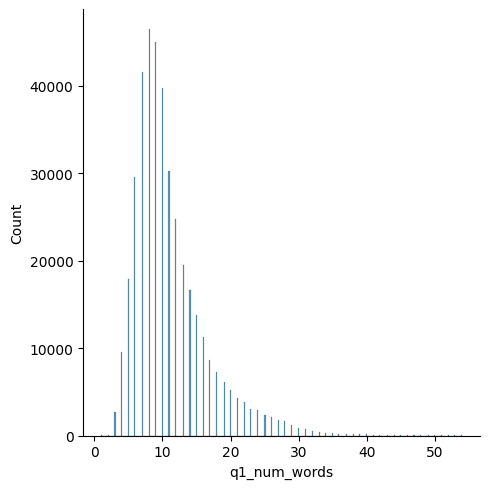

In [50]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

In [51]:
new_df=new_df[new_df['q2_num_words']<60]

minimum words 1
maximum words 59
average num of words 11


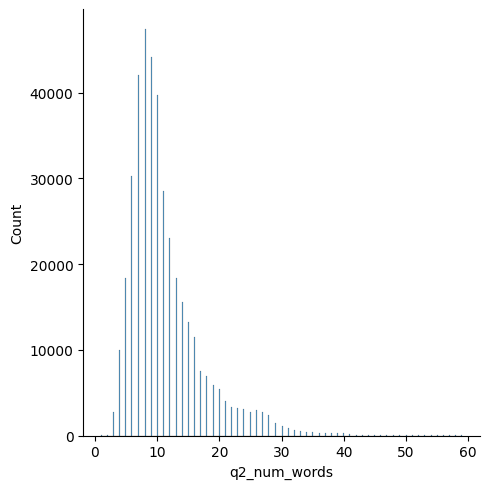

In [52]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

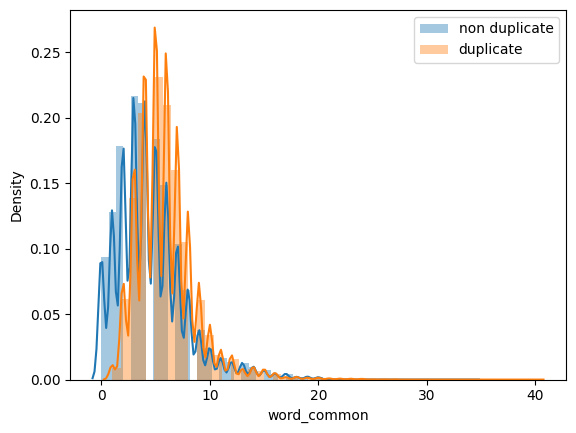

In [53]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

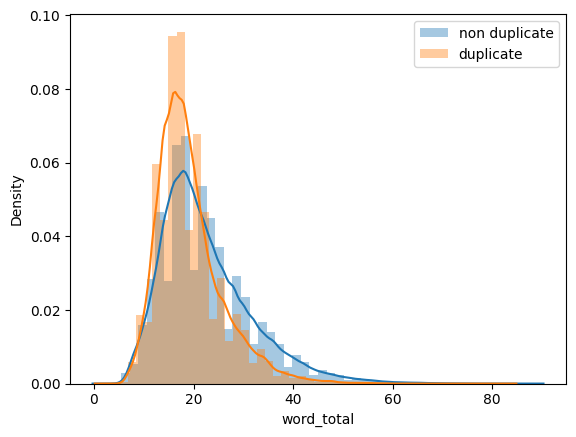

In [54]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

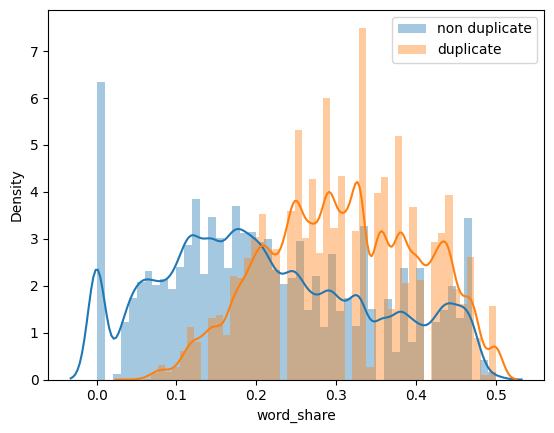

In [55]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [56]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water


In [57]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(403869, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,0.785709,0.0,1.0,2.0,13.0,0.982456,93,100,93,100
1,0,48,85,10,15,7,24,0.29,0.799984,0.399996,...,0.466664,0.0,1.0,5.0,12.5,0.571429,65,73,63,86
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,...,0.285712,0.0,1.0,4.0,12.0,0.169492,43,46,63,63
3,0,48,55,11,13,0,21,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,1.0,11.5,0.040816,10,12,25,28
4,0,73,38,13,7,4,20,0.20,0.399992,0.199998,...,0.307690,0.0,1.0,6.0,10.0,0.153846,36,55,47,67


In [ ]:
# from typing_extensions import final
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# final_df[['q1_len', 'q2_len','q1_num_words', 'q2_num_words','word_common', 'word_total', 'word_share']] = scaler.fit_transform(final_df[['q1_len', 'q2_len','q1_num_words', 'q2_num_words','word_common', 'word_total', 'word_share']])

In [58]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,0.785709,0.0,1.0,2.0,13.0,0.982456,93,100,93,100
1,0,48,85,10,15,7,24,0.29,0.799984,0.399996,...,0.466664,0.0,1.0,5.0,12.5,0.571429,65,73,63,86
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,...,0.285712,0.0,1.0,4.0,12.0,0.169492,43,46,63,63
3,0,48,55,11,13,0,21,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,1.0,11.5,0.040816,10,12,25,28
4,0,73,38,13,7,4,20,0.20,0.399992,0.199998,...,0.307690,0.0,1.0,6.0,10.0,0.153846,36,55,47,67


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# # merge texts
# questions = list(ques_df['question1']) + list(ques_df['question2'])

# cv = CountVectorizer(max_features=3000)
# q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

tf = TfidfVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(tf.fit_transform(questions).toarray(),2)

In [60]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(403869, 6000)

In [61]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(403869, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,48,85,10,15,7,24,0.29,0.799984,0.399996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,48,55,11,13,0,21,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,73,38,13,7,4,20,0.20,0.399992,0.199998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train,y_train)
y_pred1 = rf.predict(X_test)
accuracy_score(y_test,y_pred1)

0.82855869462946

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[44508,  6426],
       [ 7422, 22418]])

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix of randomforest"):
    """
    Plots a confusion matrix using seaborn heatmap.

    Parameters:
    - y_true: list or array of true labels
    - y_pred: list or array of predicted labels
    - labels: list of label names (optional)
    - title: title of the plot
    """

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


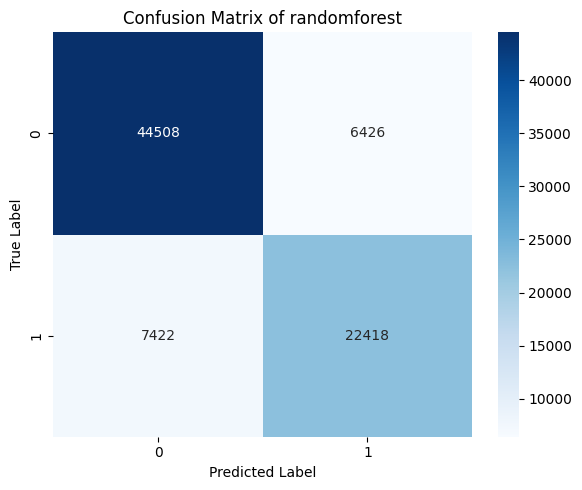

In [73]:
plot_confusion_matrix(y_test, y_pred1, labels=rf.classes_)

In [65]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 3.4 MB/s eta 0:00:00


In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8084408349221284

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[43333,  7601],
       [ 7872, 21968]])

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix of xgboost"):
    """
    Plots a confusion matrix using seaborn heatmap.

    Parameters:
    - y_true: list or array of true labels
    - y_pred: list or array of predicted labels
    - labels: list of label names (optional)
    - title: title of the plot
    """

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


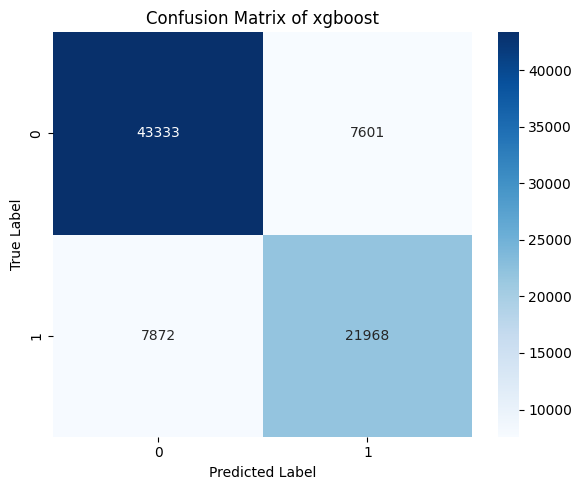

In [75]:
plot_confusion_matrix(y_test, y_pred, labels=xgb.classes_)

In [76]:
import joblib
joblib.dump(rf, "rf_model.pkl", compress=3)


['rf_model.pkl']

In [77]:
joblib.dump(tf, "tfidf.pkl", compress=3)

['tfidf.pkl']

In [ ]:
82

## Advanced Features

### 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions
- **last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise
- **first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise

### 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words)
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words)
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question

### 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy
- **token_set_ratio**: token_set_ratio from fuzzywuzzy